In [ ]:
import numpy as np
import torch
import torchvision

### louding our data

In [ ]:
dataset = torchvision.datasets.MNIST("/data",train=True, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA46AE093D0>, 5)

In [ ]:
from torchvision import transforms

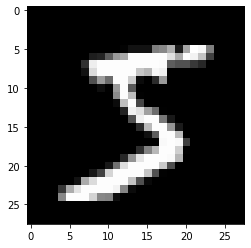

In [ ]:
import matplotlib.pyplot as plt
img , label = dataset[0]
plt.imshow(img, cmap = "gray")

### transform all the data to tensors

In [ ]:
dataset = torchvision.datasets.MNIST("/data", train= True , transform = transforms.ToTensor())

creating test train split

In [ ]:
from torch.utils.data import random_split

In [ ]:
len(dataset)

60000

In [ ]:
train_ds , test_ds =random_split(dataset, [50000, 10000], )

In [ ]:
len(train_ds) , len(test_ds)

(50000, 10000)

turn the data into batches

In [ ]:
from torch.utils.data import DataLoader
train , test = DataLoader(train_ds, 32, shuffle=True),DataLoader(test_ds, 32, shuffle=True)

### creating a model

In [ ]:
model = torch.nn.Linear((28*28), (10))

In [ ]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.0182,  0.0007,  0.0335,  ..., -0.0183,  0.0300, -0.0324],
         [-0.0093,  0.0123, -0.0324,  ...,  0.0292, -0.0309,  0.0335],
         [ 0.0251, -0.0344, -0.0356,  ...,  0.0324, -0.0054,  0.0056],
         ...,
         [ 0.0271,  0.0325,  0.0092,  ...,  0.0041, -0.0304, -0.0163],
         [ 0.0063, -0.0150, -0.0052,  ...,  0.0070, -0.0269, -0.0158],
         [-0.0155, -0.0095, -0.0232,  ...,  0.0009,  0.0309,  0.0152]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0353,  0.0194,  0.0348,  0.0032, -0.0059, -0.0071,  0.0328,  0.0248,
         -0.0175, -0.0138], requires_grad=True))

In [ ]:
for xb,yb in train:
  print(xb.shape,yb.shape)
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [ ]:
from os import supports_bytes_environ
class model_mnist(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = torch.nn.Linear((28*28), 10)
  def forward(self,xb):
    xb = xb.reshape(-1,28*28)
    return self.linear(xb)
    


In [ ]:
model= model_mnist()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
model(xb).shape

torch.Size([32, 10])

applying softmax

In [ ]:
from torch.nn import functional as F

In [ ]:
preds = model.forward(xb)

In [ ]:
preds.shape

torch.Size([32, 10])

In [ ]:
l2 = torch.argmax(F.softmax(preds,dim=1), 1)

In [ ]:
yb

tensor([2, 5, 9, 6, 6, 8, 2, 0, 1, 4, 5, 0, 9, 0, 6, 6, 7, 9, 7, 9, 8, 6, 1, 6,
        5, 8, 9, 0, 4, 4, 2, 0])

define accuracy function

In [ ]:
def accuracy(l1,l2):
  return (l1==l2).sum()/len(l1)

In [ ]:
accuracy(yb,l2)

tensor(0.1875)

In [ ]:
import math
-math.log(0.2)

1.6094379124341003

In [ ]:
F.cross_entropy(preds,yb)

tensor(2.2945, grad_fn=<NllLossBackward0>)

In [ ]:
model

model_mnist(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [ ]:
#fitting a model
for epoch in range(10):
  for xb,yb in train:
  #1- fitting model
    preds = model.forward(xb)
  # 2- calulate the loss
    preds = F.softmax(preds)
    loss = F.cross_entropy(preds,yb)
  # 3- calculate gradiant
    loss.backward()
  # 4- optimization
    opt.step()
  # 5- set back to zero
    opt.zero_grad()

    print("loss is {} , accuray is {}".format(loss, accuracy(yb, torch.argmax(preds))))
    

<ipython-input-119-f9fb7ba69f8a>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  preds = F.softmax(preds)


Streaming output truncated to the last 5000 lines.
loss is 1.6150919198989868 , accuray is 0.0
loss is 1.6927622556686401 , accuray is 0.0
loss is 1.6118836402893066 , accuray is 0.0
loss is 1.6675111055374146 , accuray is 0.0
loss is 1.585597038269043 , accuray is 0.0
loss is 1.753920078277588 , accuray is 0.0
loss is 1.628402829170227 , accuray is 0.0
loss is 1.7873244285583496 , accuray is 0.0
loss is 1.712925910949707 , accuray is 0.0
loss is 1.6187423467636108 , accuray is 0.0
loss is 1.7001749277114868 , accuray is 0.0
loss is 1.7662012577056885 , accuray is 0.0
loss is 1.571143627166748 , accuray is 0.0
loss is 1.673997163772583 , accuray is 0.0
loss is 1.673289179801941 , accuray is 0.0
loss is 1.6370213031768799 , accuray is 0.0
loss is 1.690219759941101 , accuray is 0.0
loss is 1.6430552005767822 , accuray is 0.0
loss is 1.6880388259887695 , accuray is 0.0
loss is 1.7160282135009766 , accuray is 0.0
loss is 1.597640037536621 , accuray is 0.0
loss is 1.6080430746078491 , accur